In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from dateutil import relativedelta
import warnings
warnings.filterwarnings("ignore")

# Part 1 ‑ Exploratory    data    analysis

In [2]:
# Explore data: No null values.
df = pd.read_json('logins.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
# Resample in 15 minute time intervals
df.set_index('login_time', inplace=True)
df['count'] = 1
df = df.resample('15T').sum()
df.index.names = ['Datetime']
df.head()

,count
Datetime,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [4]:
#Check to see for any null values
print(df.isnull().values.any())

True


In [5]:
#Replace null values with zeros
logins = []
for i in df.values:
    if i[0]>0:
        logins.append(i[0])
    else: logins.append(0)
df['count']=logins

In [6]:
#Check to see for any null values
print(df.isnull().values.any())

False


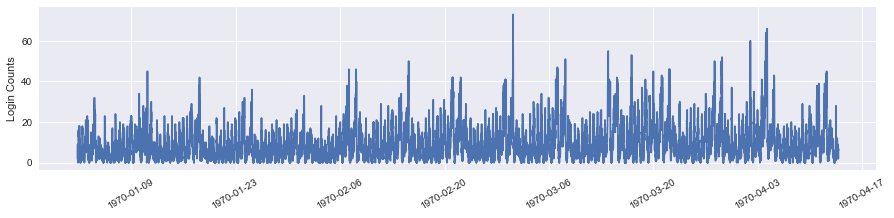

In [7]:
#plot entire time series
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
plt.xticks(rotation=30)
ax.plot(df)
plt.ylabel('Login Counts')
plt.show()

It seems there are trends, but due to overplotting, the trends are not discernible. Plotting in a shorter time frame may be more helpful.

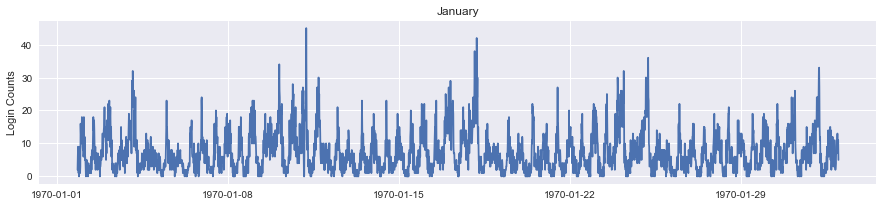

In [8]:
#plot January time series
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
ax.plot(df['1970-01-01' : '1970-02-01'])
plt.title("January")
plt.ylabel('Login Counts')
plt.show()

Trends are clearer, but there is still some overplotting. Let's try using different colors for days of the week.

In [9]:
#Create new df for each month
month_df = pd.read_json('logins.json')
month_df = month_df.set_index('login_time')

#Create column Day of Week
month_df.reset_index(drop=False, inplace=True)
month_df['Day of Week'] = month_df['login_time'].map(lambda x: x.weekday())
month_df = month_df.set_index('login_time')

jan_df = month_df['1970-01-01':'1970-01-31']
feb_df = month_df['1970-02-01': '1970-02-28']
mar_df = month_df['1970-03-01': '1970-03-31']
apr_df = month_df['1970-04-01': '1970-04-30']

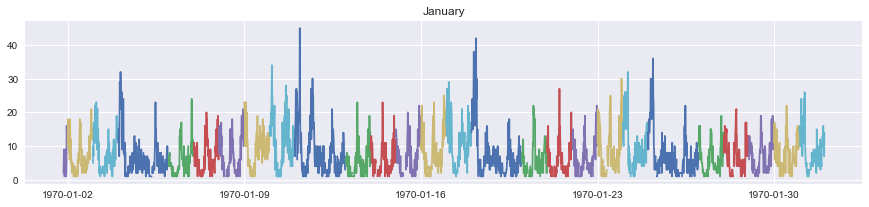

In [12]:
#Plot January days with different colors
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
for day in sorted(list(jan_df['Day of Week'].unique())):
    january = jan_df[jan_df['Day of Week'] == day]
    january.drop('Day of Week', axis=1, inplace=True)
    january['count'] = 1
    january = january.resample('15T').sum()
    ax.plot(january)
    plt.title('January')
plt.show()

The time series begins on a Thrursday, so we see an upward trend in logins in the week starting from Monday and peaking on Sunday. 

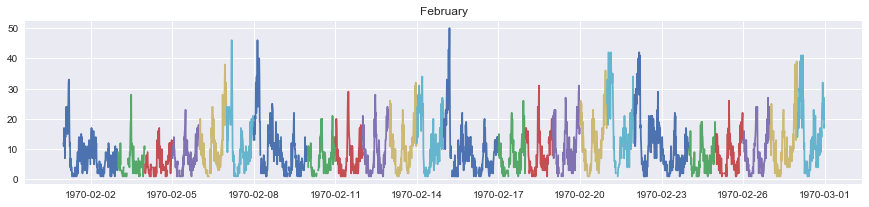

In [13]:
#Plot February days with different colors
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
for day in sorted(list(feb_df['Day of Week'].unique())):
    feb = feb_df[feb_df['Day of Week'] == day]
    feb.drop('Day of Week', axis=1, inplace=True)
    feb['count'] = 1
    feb = feb.resample('15T').sum()
    ax.plot(feb)
    plt.title('February')
plt.show()

The time series above starts on a Sunday, so we see the same trend in higher logins during weekends.

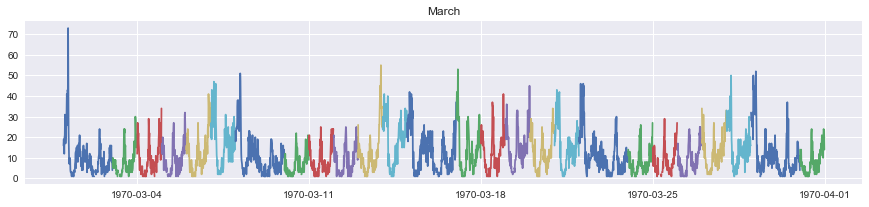

In [14]:
#Plot March days with different colors
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
for day in sorted(list(mar_df['Day of Week'].unique())):
    mar = mar_df[mar_df['Day of Week'] == day]
    mar.drop('Day of Week', axis=1, inplace=True)
    mar['count'] = 1
    mar = mar.resample('15T').sum()
    ax.plot(mar)
    plt.title('March')
plt.show()

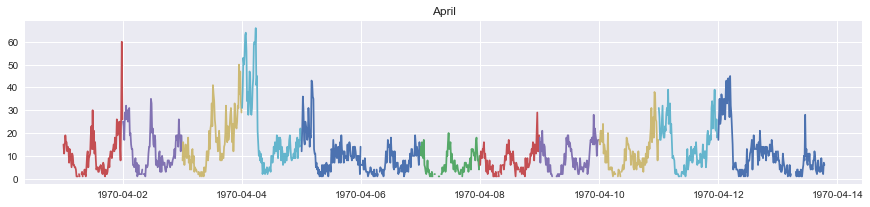

In [15]:
#Plot April days with different colors
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
for day in sorted(list(apr_df['Day of Week'].unique())):
    apr = apr_df[apr_df['Day of Week'] == day]
    apr.drop('Day of Week', axis=1, inplace=True)
    apr['count'] = 1
    apr = apr.resample('15T').sum()
    ax.plot(apr)
    plt.title('April')
plt.show()

There are only the first 14 days for April, but wee see the same trend as before. There are some trends within days, so let's look even closer at the first week.

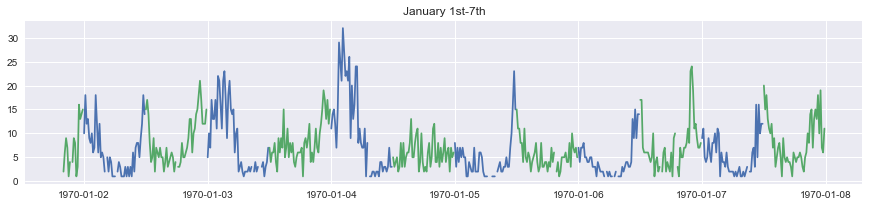

In [16]:
#Create new df for first week of January
week_df = pd.read_json('logins.json')
week_df = week_df.set_index('login_time')
week_df = week_df['1970-01-01': '1970-01-07']
week_df.reset_index(drop=False, inplace=True)

#Create column AM/PM
week_df['12 H'] = week_df['login_time'].map(lambda x: datetime.datetime.strftime(x, '%m/%d/%Y %I:%M:%S %p'))
week_df['AM/PM'] =week_df['12 H'].map(lambda x: str(x)[-2:])
week_df.drop('12 H', axis=1, inplace=True)
week_df = week_df.set_index('login_time')

#Plot January days with different colors
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
for day in sorted(list(week_df['AM/PM'].unique())):
    week = week_df[week_df['AM/PM'] == day]
    week.drop('AM/PM', axis=1, inplace=True)
    week['count'] = 1
    week = week.resample('15T').sum()
    ax.plot(week)
    plt.title('January 1st-7th')
plt.show()

The first color represent PM times. Based on the first week of January, logings peak at around noons and midnights. To see if this holds for the rest of the month, we'll plot the same graph for the entire month.

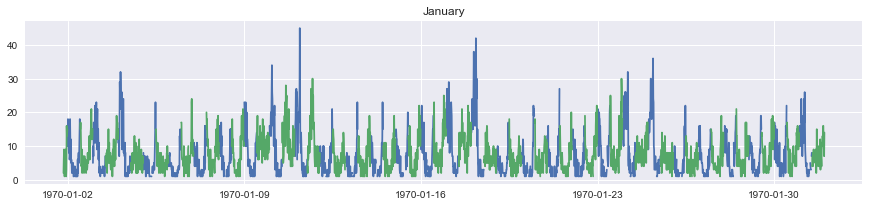

In [17]:
#Create column AM/PM
jan_df.reset_index(drop=False, inplace=True)
jan_df['12 H'] = jan_df['login_time'].map(lambda x: datetime.datetime.strftime(x, '%m/%d/%Y %I:%M:%S %p'))
jan_df['AM/PM'] = jan_df['12 H'].map(lambda x: str(x)[-2:])
jan_df.drop('12 H', axis=1, inplace=True)
jan_df.drop('Day of Week', axis=1, inplace=True)
jan_df = jan_df.set_index('login_time')

#Plot January days with different colors
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
for day in sorted(list(jan_df['AM/PM'].unique())):
    week = jan_df[jan_df['AM/PM'] == day]
    week.drop('AM/PM', axis=1, inplace=True)
    week['count'] = 1
    week = week.resample('15T').sum()
    ax.plot(week)
    plt.title('January')
plt.show()

For most day, logins peak at around noon and later at around midnight.

#### Important features and underlying patterns

There is data for four month from January 1st 1970 ending in April 14th, 1970. In fifteen minute time intervals, January has a minimum of zero logins and a maximum of 45 logins. February has a minimum of zero logins and a maximum of 50 logins. March has a minimum of zero logins and a maximum of 73 logins, and April has a minimum of zero logins and a maximum of 66 logins. 


As the months progress mean logins have an upward trend with January having 7.33 logins every fifteen minutes, February with 9.18, March with 11.33 and April with 10.99.


There is also an upward trend each week with logins increasing from Monday to Sundays, with weekends showing higher logins. The data also suggest daily cycles with higher logins during noon and midnight hours.

# Part    2 ‑ Experiment    and    metrics    design

The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.

#### 1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?

A key measure of success would be a percentage ratio of time a driver spends in each city. As of now, Gotham drivers spend 100% of their time driving in Gotham and Metropolis spend 100% of their time driving in Metropolis. If cost is not issue, since all costs are reimbursed, this ratio should naturally lower. If the cities want drivers to serve both cities equally, a ratio of 50% would measure a perfect experiment result. Since, time of activity vary by cities, a more meaning but also more complex metric would be to measure percentage of driving time in Gotham by night, and percentage of driving time in Metropolis by day. Both of these measure should be well over 50% to meet the goals of the cities. 

#### 2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   a. how     you    will     implement     the    experiment  b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats

A practical experiment I’d design would be as follow:
Since all costs will be reimbursed, using a sample size is more cost effective. Depending on a budget, I will randomly select two sufficiently large sample size of registered driver partners, one for each city. For a certain time period (1-3 months), all bridge tolls will be reimbursed. For each drivers, the percentage of time spent in their own city will be measured. 
If the experiment is unsuccessful, drivers will continue to drive 100% of their time in their own city. Using a one-tail z test I will be test the following null hypothesis: Drivers at least 80% (this percent can vary depending on the goals of city managers) of their time driving in their own city. If there is a statistical significance at a 95% confidence level, I can reject the null hypothesis and conclude drivers spend at least 20% of the time now driving in the other city. I would want to make sure the ratio also does not drop below 50% for any of the two groups, otherwise one city could attract most of the drivers from the other. 


# Part    3 ‑ Predictive     modeling


#### 1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?

In [18]:
df = pd.DataFrame(json.load((open('ultimate_data_challenge.json'))))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [19]:
#check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [20]:
#how many missing values
print('avg_rating_by_driver:', len(df[df['avg_rating_by_driver'].isnull()]))
print('avg_rating_of_driver:', len(df[df['avg_rating_of_driver'].isnull()]))   
print('phone:', len(df[df['phone'].isnull()]))

avg_rating_by_driver: 201
avg_rating_of_driver: 8122
phone: 396


In [21]:
#dates need to be formatted
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [22]:
#check numbers
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Numbers appear fine. Ratings are from 1 to 5 and percentages are out of 100.

In [23]:
#check signup dates if indeed in January
print(df['signup_date'].min())
print(df['signup_date'].max())

2014-01-01 00:00:00
2014-01-31 00:00:00


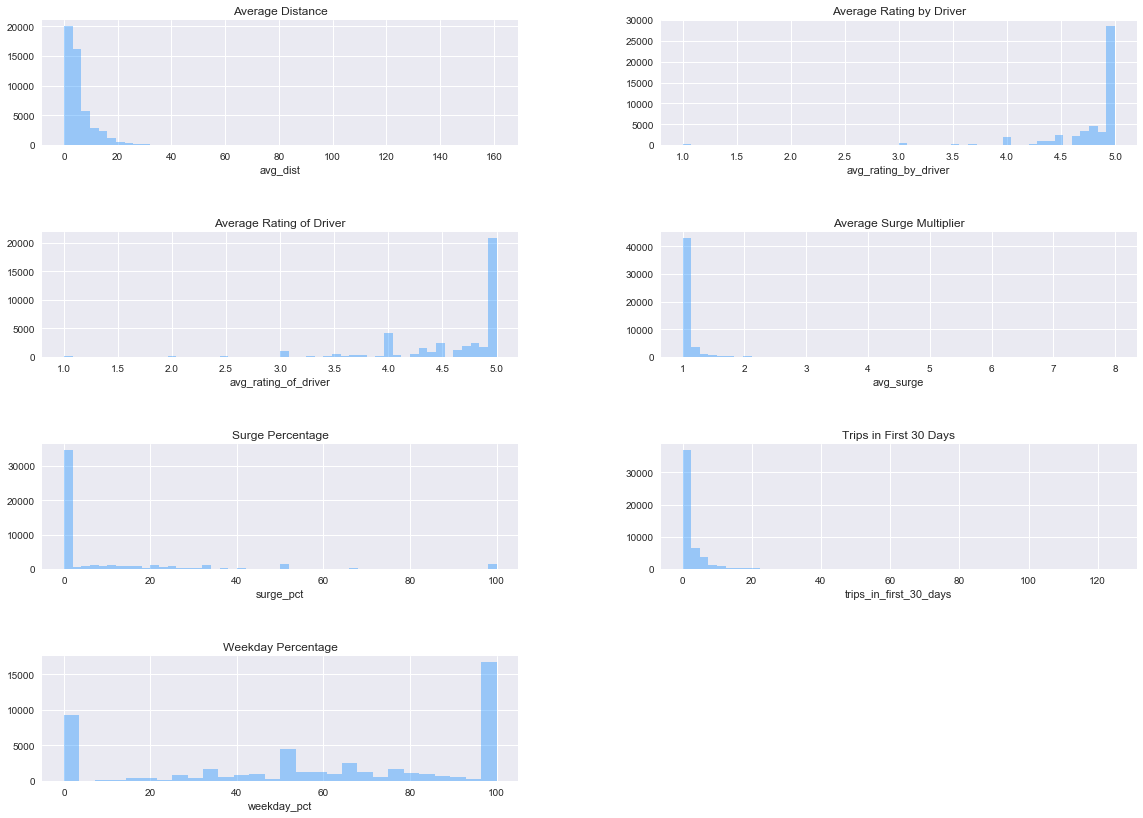

In [24]:
#check distributions
a =plt.subplot(421)
sns.distplot(df[df['avg_dist'].notnull()]['avg_dist'], color='#1e90ff', kde=False)
a.set_title("Average Distance")

b =plt.subplot(422)
sns.distplot(df[df['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'], color='#1e90ff', kde=False)
b.set_title("Average Rating by Driver")

c =plt.subplot(423)
sns.distplot(df[df['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'], color='#1e90ff', kde=False)
c.set_title("Average Rating of Driver")

d =plt.subplot(424)
sns.distplot(df[df['avg_surge'].notnull()]['avg_surge'], color='#1e90ff', kde=False)
d.set_title("Average Surge Multiplier")

e =plt.subplot(425)
sns.distplot(df[df['surge_pct'].notnull()]['surge_pct'], color='#1e90ff', kde=False)
e.set_title("Surge Percentage")

f =plt.subplot(426)
sns.distplot(df[df['trips_in_first_30_days'].notnull()]['trips_in_first_30_days'], color='#1e90ff', kde=False)
f.set_title("Trips in First 30 Days")

g =plt.subplot(427)
sns.distplot(df[df['weekday_pct'].notnull()]['weekday_pct'], color='#1e90ff', kde=False)
g.set_title("Weekday Percentage")

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=2, hspace=.7, wspace=0.3)
plt.show()

All of the distribution are what one would expect, skewed due to a few outliers. We'll plot box plot to visualize them better.

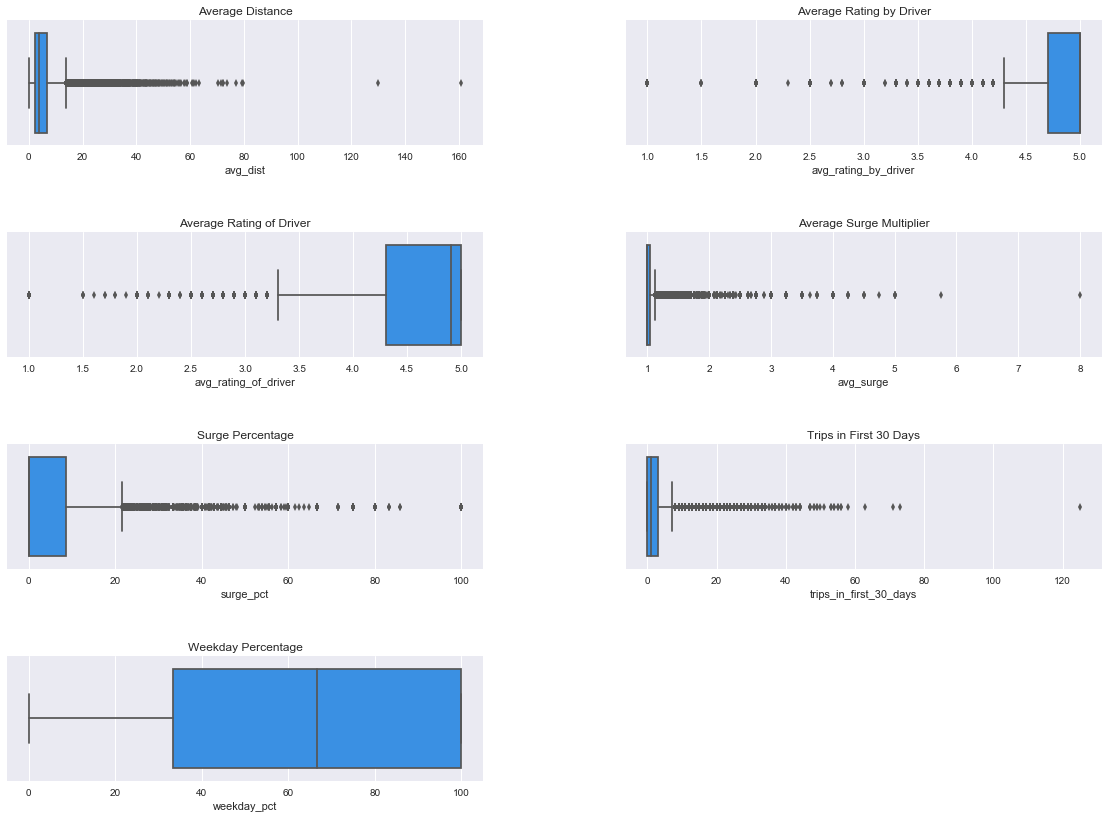

In [25]:
a =plt.subplot(421)
sns.boxplot(x=df[df['avg_dist'].notnull()]['avg_dist'], color='#1e90ff')
a.set_title("Average Distance")

b =plt.subplot(422)
sns.boxplot(x=df[df['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'], color='#1e90ff')
b.set_title("Average Rating by Driver")

c =plt.subplot(423)
sns.boxplot(x=df[df['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'], color='#1e90ff')
c.set_title("Average Rating of Driver")

d =plt.subplot(424)
sns.boxplot(x=df[df['avg_surge'].notnull()]['avg_surge'], color='#1e90ff')
d.set_title("Average Surge Multiplier")

e =plt.subplot(425)
sns.boxplot(x=df[df['surge_pct'].notnull()]['surge_pct'], color='#1e90ff')
e.set_title("Surge Percentage")

f =plt.subplot(426)
sns.boxplot(x=df[df['trips_in_first_30_days'].notnull()]['trips_in_first_30_days'], color='#1e90ff')
f.set_title("Trips in First 30 Days")

g =plt.subplot(427)
sns.boxplot(x=df[df['weekday_pct'].notnull()]['weekday_pct'], color='#1e90ff')
g.set_title("Weekday Percentage")

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=2, hspace=.7, wspace=0.3)
plt.show()

"Avg_dist" shows two distant outliers with distances over 120 and "trips_in_first_30_days" has an outlier with a value over 120. Let's see now categorial data.

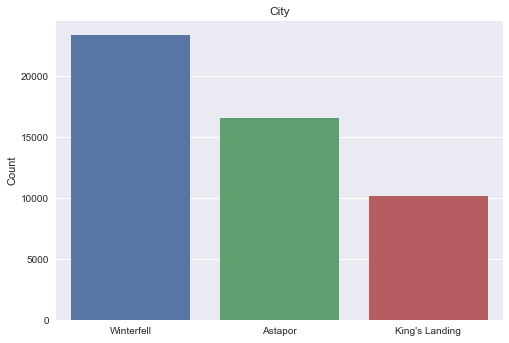

In [27]:
sns.barplot(x=df['city'].value_counts().index, y=df['city'].value_counts())
plt.title('City')
plt.ylabel('Count')
plt.show()

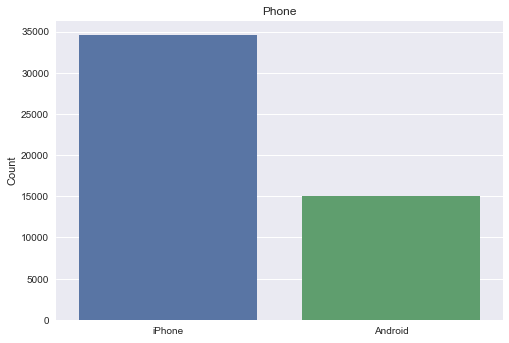

In [28]:
sns.barplot(x=df[df['phone'].notnull()]['phone'].value_counts().index, y=df[df['phone'].notnull()]['phone'].value_counts())
plt.title('Phone')
plt.ylabel('Count')
plt.show()

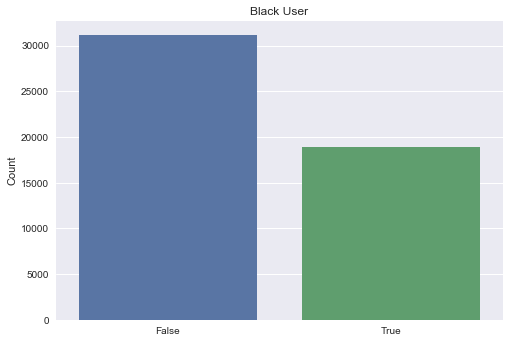

In [29]:
sns.barplot(x=df['ultimate_black_user'].value_counts().index, y=df['ultimate_black_user'].value_counts())
plt.title('Black User')
plt.ylabel('Count')
plt.show()

#### What  fraction     of     the    observed     users    were     retained?

In [30]:
retained_date = df['last_trip_date'].max() - pd.Timedelta('30 day')
retained_date

Timestamp('2014-06-01 00:00:00')

In [31]:
print('Fraction of observed users retained:', str(round((len(df[df['last_trip_date']>=retained_date])/len(df)*100),2))+'%')

Fraction of observed users retained: 37.61%


#### 2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.

First determine which users are active in their 6th month on the system. Users active on their 7th month are assumed to have also been active in their 6th month.

In [32]:
#Create column with date six months after signup
six_month =[]
for i in df['signup_date']:
    six_month.append(i + relativedelta.relativedelta(months=+6))
df['signup + 6 months']= six_month
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup + 6 months
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-07-25
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-07-29
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-07-06
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-07-10
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-07-27


In [33]:
#Create column with active users after six months
active = []
for i in df.values:
    if i[12]-i[5]>pd.Timedelta('30 day'):
        active.append(0)
    else:
        active.append(1)
df['active'] = active
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup + 6 months,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-07-25,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-07-29,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-07-06,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-07-10,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-07-27,0


In [34]:
#fill missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

We’ll build a random forest classifier due to the number of features. This model also does not over fit the training set as much as decision trees and also does not require cross validation. 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
#drop non-parameters
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)
df.drop('signup + 6 months', axis=1, inplace=True)

In [37]:
#Create dummie variables for categorical data
df = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,1,0


In [38]:
# separate parameters and labels
df['active_in_sixth_month'] =df['active']
df.drop('active', axis=1, inplace=True)

In [39]:
df_x = df.iloc[:,:-1]
df_y = df.iloc[:,-1]

In [40]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.2, random_state=4)

In [41]:
#Run Random Forrest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
#Calculate predictions based testing data
predictions = rf.predict(x_test)

In [43]:
#Model Accuracy
count = 0
for i in range(len(predictions)):
    if predictions[i]==y_test.values[i]:
        count+=1
count/len(predictions)

0.7761

In [44]:
import sklearn
from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(y_test, predictions, labels=None, sample_weight=None)

array([[6661,  910],
       [1329, 1100]])

The model is able to accurately predict 77% of the testing data and fairly good job at predicting if a user is not active (6633/7985)=83% as shown in the confusion matrix. The model is however not particularly good at determining If a user is indeed active (1077/2015) =53%.  

Feature ranking:
1. feature 0 (0.282567)
2. feature 6 (0.156134)
3. feature 5 (0.106451)
4. feature 2 (0.103542)
5. feature 1 (0.102235)
6. feature 4 (0.086406)
7. feature 3 (0.072423)
8. feature 8 (0.022773)
9. feature 11 (0.015045)
10. feature 10 (0.014077)
11. feature 12 (0.012038)
12. feature 13 (0.011534)
13. feature 7 (0.009538)
14. feature 9 (0.005236)


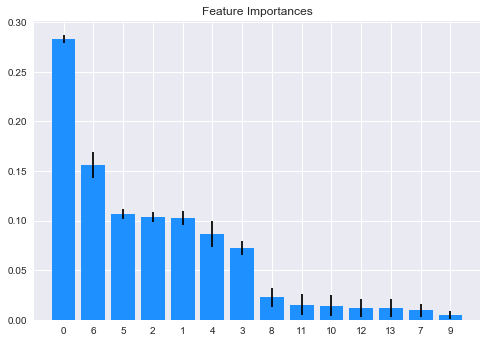

In [45]:
#Plot Feature Importances
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using informative features
X, y = x_train, y_train

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="#1e90ff", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [46]:
print("Features: \n0: Average Distance \n1: Average Rating by Driver \n2: Average Rating of Driver \n3: Average Surge \n4: Surge Percent \n5: Trips in first 30 days \n6: Weekday Percent \n7: City Astapor \n8: City King's Landings \n9: City Winterfell \n10: Phone Android \n11: Phone IPhone \n12: Black User False \n13: Black User True" )


Features: 
0: Average Distance 
1: Average Rating by Driver 
2: Average Rating of Driver 
3: Average Surge 
4: Surge Percent 
5: Trips in first 30 days 
6: Weekday Percent 
7: City Astapor 
8: City King's Landings 
9: City Winterfell 
10: Phone Android 
11: Phone IPhone 
12: Black User False 
13: Black User True


The most important predictive features are a user's average distance, weekday percent, and the number of trips in the first 30 days. 

#### 3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).

Ultimate should focus on the top predictive features from the random forest model:

1. Average Distance: This is by far the most important predictor. Users that travel longer distances, are retained more, so Ultimate should try to incentivize longer travels. The company could lower fees for longer distances and monitor retention rates.

2. Weekday Percent: Users that travel more during weekdays are more likely to be retained. These users are probably travelling due to work. So Ultimate could create a program geared to workers that commute using their platform. 

3. Trips in the first 30 days: It makes sense that users who use Ultimate often in their first 30 days, are more likely to keep riding. Ultimate could offer discounts or even free rides during the first month to increase retention.
